<a href="https://colab.research.google.com/github/JairEsc/Mat_Apl_2/blob/main/NN_small_base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import tqdm
from time import time

# Estructura de los datos.

Consideramos un caso general, una base con datos de frecuencias de especies, cada observación de dimensión $k$, y supongamos que tenemos $n$ observaciones.

El output busca ser la clasificación en una de $d$ categorías, definidas ya sea por ciudad o localización-clima (pero de un sólo tipo).


# Datos de ejemplo

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("Dataset_w_tags.csv")
df.head()
from sklearn.utils import shuffle
df = shuffle(df)###El ajuste depende de este shuffle*****

In [3]:
print(df.shape)

(237, 513)


Se tienen 237 observaciones, cada una es una muestra en una "localización".
Por renglón, se tienen frecuencias de "bichos" de 510 "dominant taxa".

En este caso, $k=510$, $n=237$.

In [4]:
ytags=df['Tag']
print(ytags)

63        Cold forests_6
143     Dry grasslands_0
70         Dry forests_0
138        Dry forests_0
148             Boreal_5
             ...        
164     Dry grasslands_1
65     Cold grasslands_1
213        Dry forests_0
36     Cold grasslands_1
117        Dry forests_0
Name: Tag, Length: 237, dtype: object


In [5]:
ytags

63        Cold forests_6
143     Dry grasslands_0
70         Dry forests_0
138        Dry forests_0
148             Boreal_5
             ...        
164     Dry grasslands_1
65     Cold grasslands_1
213        Dry forests_0
36     Cold grasslands_1
117        Dry forests_0
Name: Tag, Length: 237, dtype: object

In [6]:
import numpy as np
_,idx = np.unique(ytags,return_inverse=True)

Dados los datos con su respectiva clasificación. (En el ejemplo $d=12$)


Lamentablemente los datos tienen clases sub-representadas

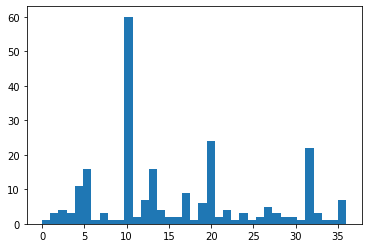

In [ ]:
plt.hist(idx,bins=37)
plt.show()#Mala representatividad de clases.

# Definición del modelo.

# Partición de datos

In [7]:
from keras.utils import to_categorical
X_total=df.drop(columns=['Tag','Dominant_taxa_ID/ID_Environmental'])
Y_total=to_categorical(idx)

In [8]:
X_train=X_total[0:200]#200?
Y_train=Y_total[0:200]

In [9]:
df.head()
k,n=X_train.shape
n=n#-indice, -tag
print(k,n)

200 511


In [10]:
input_shape = (n,)#=n
output_shape=len(np.unique(ytags))

In [12]:
import tensorflow as tf
import keras
import pandas as pd
from keras import layers
from keras import models


# Capas, neuronas, funciones de activación, loss.

In [13]:
model = models.Sequential()

model.add(layers.InputLayer(input_shape=(n,), name='Input_Layer'))#Obligatoria
model.add(layers.Dense(512, activation='relu'))# Numero de capas ocultas: Opcional
model.add(layers.Dense(64, activation='relu'))# Numero de neuronas en cada capa: Opcional
model.add(layers.Dense(37, activation='Softmax', name='Output_Layer'))#Obligatoria
model.summary()
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
import time
tic = time.time()

model.fit(x = X_train, 
           y = Y_train, 
          validation_data=[X_total[200:], Y_total[200:]],##Cuando haya otra base, se modifica ese 200
          batch_size=10,
           epochs=20,
           verbose=2,shuffle=True)

print('seconds=', time.time()-tic)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               262144    
                                                                 
 dense_1 (Dense)             (None, 64)                32832     
                                                                 
 Output_Layer (Dense)        (None, 37)                2405      
                                                                 
Total params: 297,381
Trainable params: 297,381
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
20/20 - 2s - loss: 11.0242 - accuracy: 0.2500 - val_loss: 3.1122 - val_accuracy: 0.3514 - 2s/epoch - 86ms/step
Epoch 2/20
20/20 - 0s - loss: 2.5334 - accuracy: 0.3550 - val_loss: 2.0555 - val_accuracy: 0.4054 - 354ms/epoch - 18ms/step
Epoch 3/20
20/20 - 0s - loss: 1.8716 - accuracy: 0.5150 - val_loss: 

In [ ]:
model.save('primer_intento.h5')

In [15]:
import numpy as np

test_predicted_labels_raw = model.predict(X_total[200:])
test_true_labels      = np.argmax(Y_total[200:],axis=1)
test_predicted_labels = np.argmax(test_predicted_labels_raw,axis=1)

2/2 [==============================] - 0s 12ms/step


In [16]:
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score,confusion_matrix, precision_score, recall_score,roc_auc_score

from sklearn.metrics import f1_score, cohen_kappa_score
import seaborn as sns 

accuracy = accuracy_score(test_true_labels,test_predicted_labels)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(test_true_labels,test_predicted_labels,average='weighted',zero_division=1)
print('Precision: %f',precision)
# recall: tp / (tp + fn)
recall = recall_score(test_true_labels,test_predicted_labels,average='weighted',zero_division=1)
print('Recall: %f' , recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(test_true_labels,test_predicted_labels,average='weighted')
print('F1 score: %f' % f1)

Accuracy: 0.594595
Precision: %f 0.815958815958816
Recall: %f 0.5945945945945946
F1 score: 0.539254


Bajo desempeño.

Faltaba el AUC-multiclase

In [21]:
test_predicted_labels_raw

array([[1.3355802e-05, 1.9203057e-06, 3.3743044e-09, ..., 3.5941116e-07,
        5.4132792e-09, 2.0958680e-06],
       [6.2519364e-13, 4.7993161e-17, 8.6712620e-14, ..., 1.2816147e-21,
        2.5330946e-12, 4.2118863e-19],
       [7.0958427e-05, 8.8377167e-11, 8.5403275e-07, ..., 2.2290443e-07,
        1.3115303e-20, 1.1820621e-03],
       ...,
       [1.0365657e-04, 5.2754845e-09, 1.3032038e-09, ..., 2.7586320e-11,
        2.4661767e-14, 1.3636487e-06],
       [1.6049524e-03, 2.7471708e-04, 4.5022974e-04, ..., 1.1849615e-05,
        7.5702986e-04, 4.1870418e-04],
       [2.8020774e-18, 3.1436906e-25, 8.0917263e-20, ..., 9.2530236e-30,
        1.4471381e-16, 1.0086571e-28]], dtype=float32)

In [23]:
test_true_labels

array([ 5, 10, 27, 10, 10, 32, 20, 22, 10, 20, 28, 13, 10, 20, 23, 18, 11,
       36, 30,  4, 12, 32, 17, 10, 10, 16, 17, 10,  7,  3, 10, 27, 12,  5,
       10,  5, 10])

In [24]:
print("AUC-ROC: ",roc_auc_score(y_true=test_true_labels,y_score=np.array(test_predicted_labels_raw).tolist()labels=37,,multi_class ='ovr'))

SyntaxError: ignored

Mis datos de validación no tienen elementos de cada clase, por eso marca error.